# Task 22 - Image Processing

## Create a copy of **MNIST.ipyd** file and rename it **MNIST_task.ipyd**

In [1]:
import numpy as np

import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)

# Print to show there are 1797 labels (integers from 0-9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


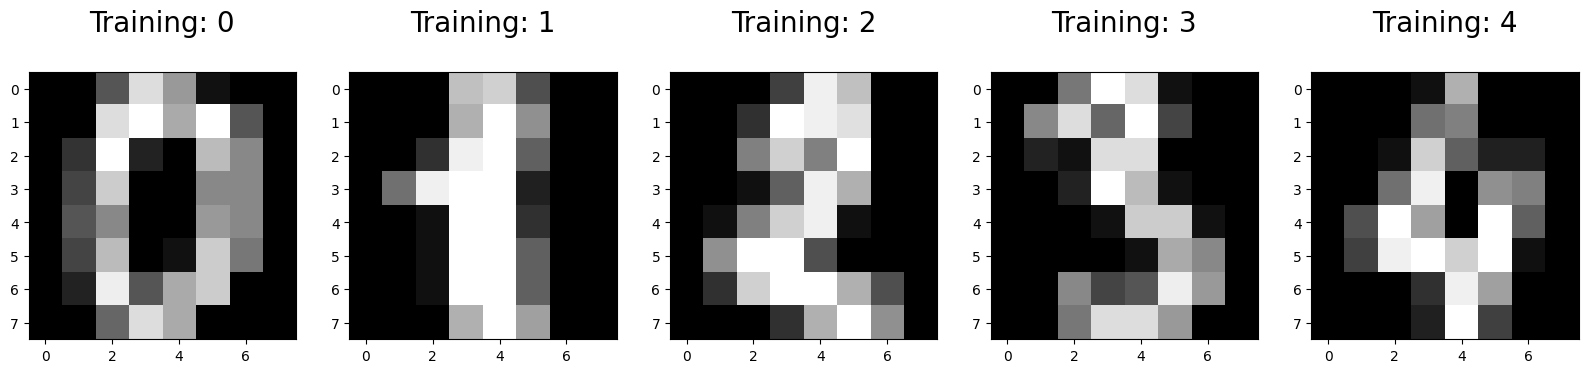

In [3]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

## Load the MNIST dataset. Use a library such as scikit-learn to access the dataset (**from sklearn.datasets import load_digits**)

### *this has been done by the MNIST.ipyd file that was copied so does not need to be reloaded*

## Split the data into train and test sets. 
    Add a comment explaining the purpose of the train and test sets

In [77]:
#Import additional libraries we may use. 
#Typically these would all be imported together but to preserve the initial MNIST.ipyd file for the task I have split them

import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report 

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score


In [40]:
# x = input data in this case the image data
X = digits.data

# y = target data
y = digits.target

# splitting data into train and test is done to ensure accuracy and reliability of the trained model and reduce the chance of overfitting 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, stratify=y)

print ("Training data:",X_train.shape, y_train.shape)
print ("Test data:",X_test.shape, y_test.shape)

Training data: (1347, 64) (1347,)
Test data: (450, 64) (450,)


## Use the RandomForestClassifier built into the scikit-learn to create a classification model. 

In [42]:
rfm = RandomForestClassifier()

rfm.fit(X_train, y_train.ravel())
rfm_score = rfm.score(X_test, y_test)

In [66]:
# make predictions on test data
y_pred = rfm.predict(X_test)

print(classification_report(y_pred, y_test)) 

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        45
           1       1.00      1.00      1.00        46
           2       1.00      1.00      1.00        44
           3       0.93      1.00      0.97        43
           4       1.00      0.98      0.99        46
           5       0.96      0.98      0.97        45
           6       1.00      1.00      1.00        45
           7       0.98      1.00      0.99        44
           8       1.00      0.93      0.97        46
           9       0.98      0.96      0.97        46

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



## Pick one parameter to tune, and explain why you chose this parameter.

In [43]:
rfm.get_params(deep=True)

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Scilearn says most important are: 
* n_estimator (number of features considered for splitting)
* max_features

The following also have a greater impact on the accuracy scores
* max_depth = max number of levels in each decision tree
* min_samples_split = min number of data points placed in a node before the node is split
* min_samples_leaf = min number of data points allowed in a leaf node

We already have a very high accuracy score so there is potential to lesson the accuracy from 0.9822

To pick just **ONE** parameter is a tough call, for this I will use n_estimators as Scilearn suggests it is the most important. 

In [67]:
#n-estimators default is 100 
params = {'n_estimators': [10, 25, 50, 100, 150, 200],}

In [68]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rfm,
                           param_grid = params,
                           scoring="accuracy")

grid_search.fit(X_train, y_train)


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [10, 25, 50, 100, 150, 200]},
             scoring='accuracy')

## Select a value for the parameter to use during testing on the test data, and provide a rationale for your choice

In [72]:
#Check grid
print(grid_search.best_params_)


{'n_estimators': 150}


In [ ]:
# make predictions on test data
y_pred = rfm.predict(X_test)

print(classification_report(y_pred, y_test)) 

## Print the confusion matric for your Random Forest model on the test set

Text(162.25, 0.5, 'True Value')

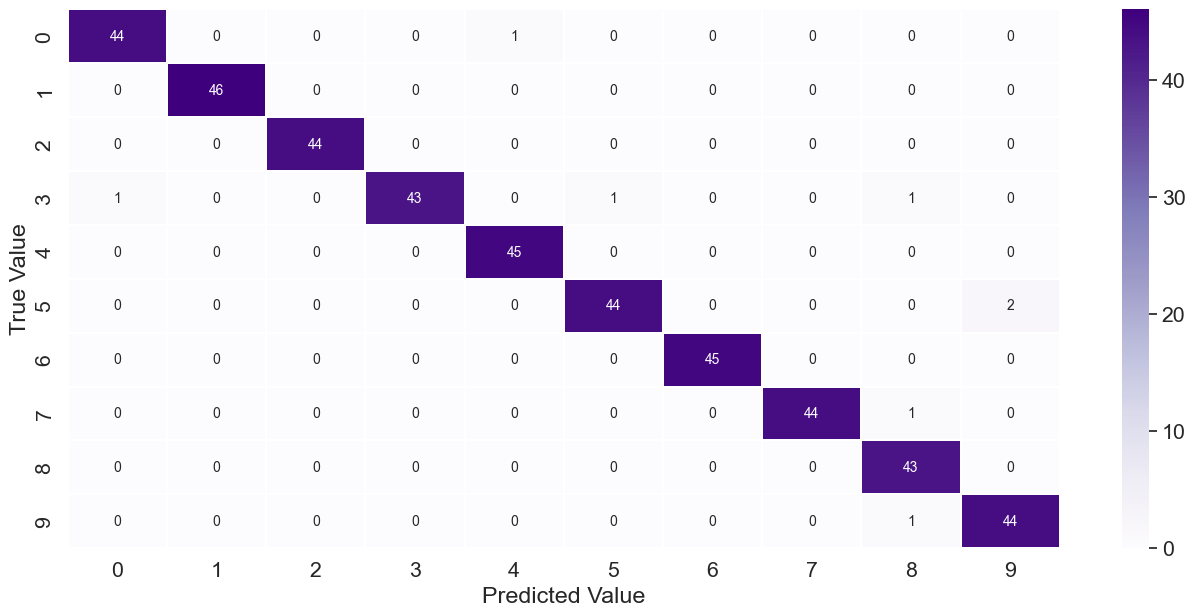

In [80]:
#confusion matrix with seaborn heatmap for ease of viewing
matrix = confusion_matrix(y_test, y_pred)

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Purples, linewidths=0.2)
plt.xlabel('Predicted Value')
plt.ylabel('True Value')

*The model has a high level of accuracy making the heatmap less effective*


## Report which classes the model struggles with the most

The model is highly accurate but had the most errors with mislabelling "5"s as "9"s - having done so twice. 

## Report the accuracy, precision, recall and f1-score. *Hint: use average="macro" in precision_score, recall_score and f1_score from scikit-learn

In [81]:
# Accuracy 
# sklearn.metrics.accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None
ac= accuracy_score(y_test, y_pred)
print('Accuracy Score:', ac)


# def - "macro" : Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.

# Precision
# sklearn.metrics.precision_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')[source]¶
ps= precision_score(y_test, y_pred, average="macro")
print('Precision Score:', ps)

#Recall 
# sklearn.metrics.recall_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')[source]
rs= recall_score(y_test, y_pred, average="macro")
print('Recall Score:', rs)

#F1-Score
# sklearn.metrics.f1_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')
f1 = f1_score(y_test, y_pred, average="macro")
print('F1 Score:', f1)


Accuracy Score: 0.9822222222222222
Precision Score: 0.982512077294686
Recall Score: 0.9824637681159419
F1 Score: 0.9822203015461441
